In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, InputLayer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
max_features = 1000
maxlen = 500
batch_size = 32

In [4]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [7]:
model = Sequential([
    InputLayer((500,)),
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [9]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - acc: 0.5220 - loss: 0.6913 - val_acc: 0.6136 - val_loss: 0.6548
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 24s 115ms/step - acc: 0.6977 - loss: 0.5866 - val_acc: 0.7133 - val_loss: 0.5722
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 160ms/step - acc: 0.7708 - loss: 0.4809 - val_acc: 0.7608 - val_loss: 0.5089
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 132ms/step - acc: 0.8159 - loss: 0.4178 - val_acc: 0.6919 - val_loss: 0.6272
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - acc: 0.8429 - loss: 0.3768 - val_acc: 0.7635 - val_loss: 0.5341


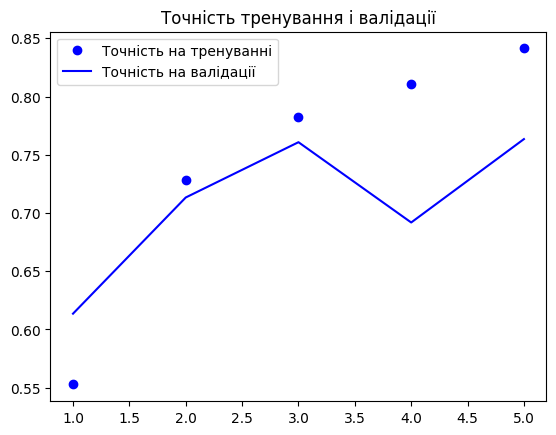

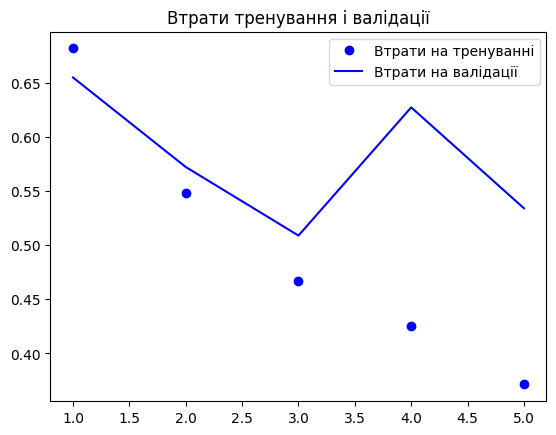

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


In [11]:
model = Sequential([
    InputLayer((500,)),
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [13]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 52s 327ms/step - acc: 0.5320 - loss: 0.6878 - val_acc: 0.7133 - val_loss: 0.5781
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 47s 340ms/step - acc: 0.7237 - loss: 0.5545 - val_acc: 0.7488 - val_loss: 0.5079
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 310ms/step - acc: 0.7826 - loss: 0.4681 - val_acc: 0.7232 - val_loss: 0.5602
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 311ms/step - acc: 0.8017 - loss: 0.4366 - val_acc: 0.8137 - val_loss: 0.4103
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - acc: 0.8186 - loss: 0.4074 - val_acc: 0.8411 - val_loss: 0.3704


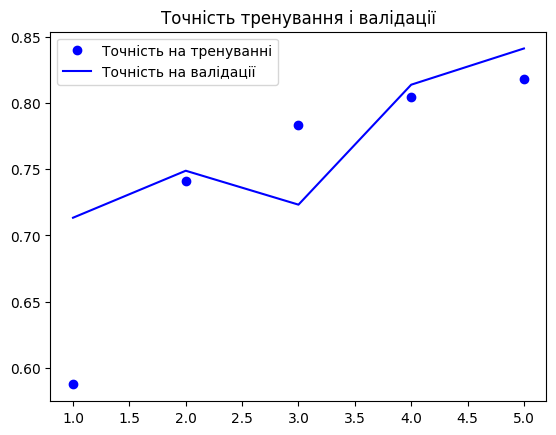

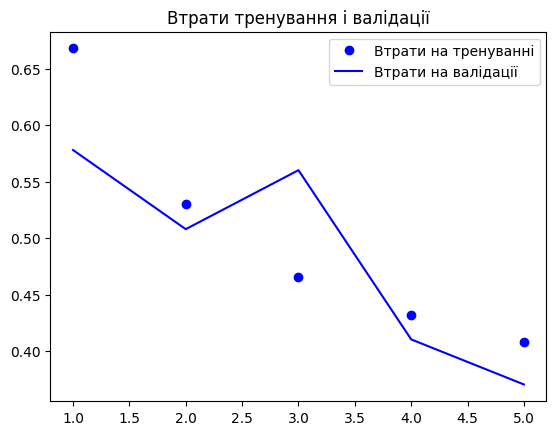

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки
